In [121]:
import collections
import ephem
import math
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib inline

In [122]:
Feature = collections.namedtuple("Feature", "latitude longitude")

In [123]:
def find_vis_long(long):
    return ((math.pi / 2) - min(long)) / (max(long) - min(long))

In [134]:
def find_feature_angle(f):
    x = math.degrees(math.atan2(f.longitude[1], f.latitude[1]))
    x += 360.0 if x < 0 else 0.0
    return x

In [185]:
def find_delta_phase_angle(pa, fa):
    dpa = pa - fa
    x = dpa > 180.0
    x = x.astype(int) * 360.0
    dpa -= x
    return dpa

In [186]:
# Mare Smythii
f1 = Feature(latitude=np.radians(np.array([-7.684334732779745, -1.71, 4.266823790779825])), 
             longitude=np.radians(np.array([81.16044008945715, 87.05, 92.93850100254303])))
# Mare Australe
f2 = Feature(latitude=np.radians(np.array([-63.94923734167575, -47.77, -31.591821188721646])),
             longitude=np.radians(np.array([70.5202567544471, 91.99, 113.4504706826697])))
# Mare Marginis
f3 = Feature(latitude=np.radians(np.array([8.3117369442041, 12.70, 17.0920218257959])),
             longitude=np.radians(np.array([80.41428488610364, 86.52, 92.61630362389656])))
# Mare Humboltanium
f4 = Feature(latitude=np.radians(np.array([53.7400238662091, 56.92, 60.1041672377911])),
             longitude=np.radians(np.array([74.6707049736925, 81.54, 88.4149638543077])))

f_list = [f1, f2, f3, f4]
f_name = ["Mare Smythii", "Mare Australe", "Mare Marginis", "Mare Humboltanium"]

In [202]:
def make_plots(i, f, name, obs_date=None):
    observer = ephem.Observer()
    observer.lat = "35:58:10"
    observer.lon = "-84:19:0"
    if obs_date is None:
        #observer.date = (2018, 5, 26, 22, 0, 0)
        observer.date = (2017, 4, 4, 23, 30, 0)
        #observer.date = (2017, 11, 24, 22, 0, 0)
        #observer.date = (2017, 12, 3, 22, 0, 0)
    else:
        observer.date = obs_date
    moon = ephem.Moon()
    
    feature_angle = find_feature_angle(f)
    
    lib_lat = []
    lib_lon = []
    lib_tot = []
    phase_angle = []
    vis_arr = []
    time_steps = 1000
    time_constant = 1.0
    for i in range(time_steps):
        moon.compute(observer)
        lib_lat.append(moon.libration_lat)
        lib_lon.append(moon.libration_long)
        tot = math.sqrt(lib_lat[-1]**2 + lib_lon[-1]**2)
        pa = math.atan2(lib_lon[-1], lib_lat[-1])
        pa += 2.0 * math.pi if pa < 0 else 0.0
        phase_angle.append(pa)
        lib_tot.append(tot)
        longitude = f.longitude - moon.libration_long
        vis_arr.append(find_vis_long(longitude))
        observer.date += time_constant * ephem.hour

    alib_lat = np.degrees(np.array(lib_lat))
    alib_lon = np.degrees(np.array(lib_lon))
    alib_tot = np.degrees(np.array(lib_tot))
    aphase_angle = np.degrees(np.array(phase_angle))
    time = np.arange(time_steps)
    avis_arr = np.array(vis_arr)
    #delta_pa = aphase_angle - feature_angle
    delta_pa = find_delta_phase_angle(aphase_angle, feature_angle)
    
    print(name)
    print(avis_arr[0], alib_lon[0], alib_lat[0], alib_tot[0], aphase_angle[0], feature_angle, delta_pa[0])

    fig = plt.figure(i)
    fig.suptitle(name)
    axes = fig.subplots(2, 2)
    axes[0][0].plot(alib_tot, avis_arr)
    axes[0][1].plot(alib_lat, avis_arr)
    axes[1][0].plot(alib_lon, avis_arr)
    axes[1][1].plot(delta_pa, avis_arr)

Mare Smythii
1.1995859985 5.28923705024 3.50691897382 6.34622007675 56.4544569437 91.12536684108402 -34.6709098974


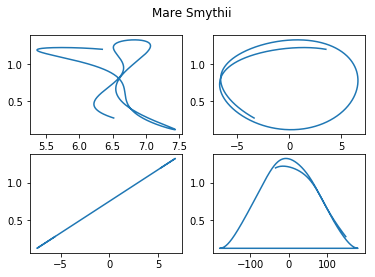

In [203]:
make_plots(0, f1, f_name[0])

Mare Australe
0.576959163008 5.28923705024 3.50691897382 6.34622007675 56.4544569437 117.44265251628761 -60.9881955726


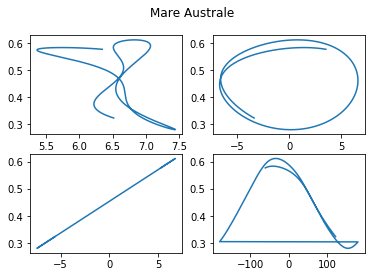

In [204]:
make_plots(1, f2, f_name[1])

Mare Marginis
1.21905665643 5.28923705024 3.50691897382 6.34622007675 56.4544569437 81.64936641409416 -25.1949094704


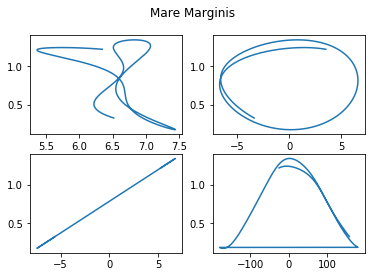

In [205]:
make_plots(2, f3, f_name[2])

Mare Humboltanium
1.50015597462 5.28923705024 3.50691897382 6.34622007675 56.4544569437 55.08255905447616 1.37189788924


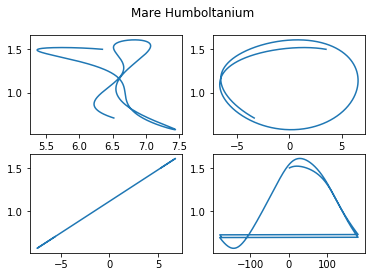

In [206]:
make_plots(3, f4, f_name[3])

A
0.994428759021 2.93314510825 5.51752192054 6.24871093664 27.9953583054 91.31691240579326 -63.3215541004


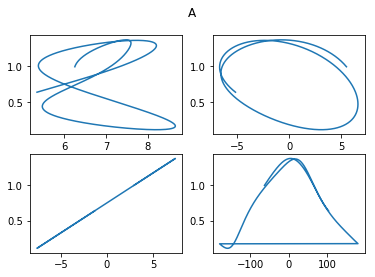

In [207]:
# Unit tests
make_plots(4, Feature(latitude=np.radians(np.array([-8., -2., 4.])), 
                      longitude=np.radians(np.array([81., 87., 93.]))), 
           "A", obs_date=(2017, 5, 27, 12, 21, 0))

A
0.322014073443 -5.13583111869 -0.627896103644 5.17407139462 263.02972723 91.31691240579326 171.712814824


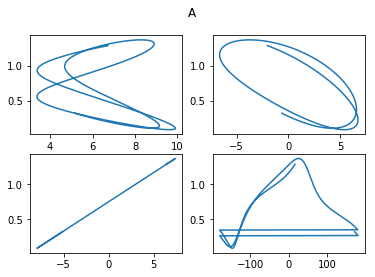

In [208]:
# Unit tests
make_plots(4, Feature(latitude=np.radians(np.array([-8., -2., 4.])), 
                      longitude=np.radians(np.array([81., 87., 93.]))), 
           "A", obs_date=(2017, 11, 24, 22, 0, 0))

B
1.03609542569 2.93314510825 5.51752192054 6.24871093664 27.9953583054 81.45303999265579 -53.4576816873


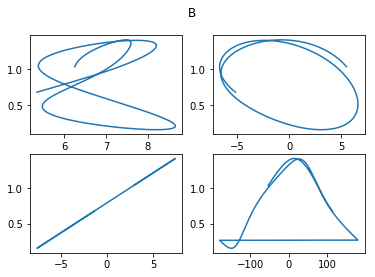

In [209]:
# Unit tests
make_plots(4, Feature(latitude=np.radians(np.array([8.5, 13., 17.5])), 
                      longitude=np.radians(np.array([80.5, 86.5, 92.5]))), 
           "B", obs_date=(2017, 5, 27, 12, 21, 0))

B
0.363680740109 -5.13583111869 -0.627896103644 5.17407139462 263.02972723 81.45303999265579 -178.423312762


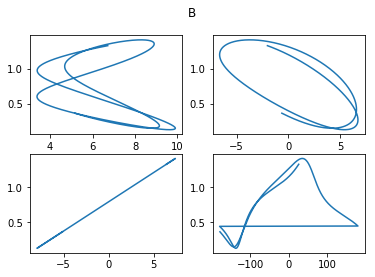

In [210]:
# Unit tests
make_plots(4, Feature(latitude=np.radians(np.array([8.5, 13., 17.5])), 
                      longitude=np.radians(np.array([80.5, 86.5, 92.5]))), 
           "B", obs_date=(2017, 11, 24, 22, 0, 0))